A: C <br>
B: C E <br>
C: A B D F<br>
D: C F<br>
E: B F G<br>
F: C D E H J L<br>
G: E J<br>
H: F<br>
I: J<br>
J: G I<br>
K: L<br>
L: F K M N P<br>
M: L<br>
N: L P<br>
P: L N Q R <br>
Q: P R T S<br>
R: P Q T<br>
S: Q U<br>
T: Q R<br>
U: S

In [1]:
# floor 0
edges = [
    ("0.1", "0.2"),
    ("0.1", "0.3"),
    ("0.1", "1.15"),
    ("0.1", "gthall"),
    ("0.1", "3.1"),
    ("0.2", "0.3"),
    ("0.3", "0.4"),
    ("0.4", "0.5"),
    ("0.5", "0.6"),
    ("0.6", "1.11"),
    ("0.6", "2.9"),
    ("0.7", "1.1"),
    ("0.7", "2.1"),
    ("0.7", "Entrance"),     
    ("0.7", "0.9"),
    ("0.8", "0.9"),
    ("0.9", "0.10"),
    ("0.9", "0.11"),
    ("0.11", "0.12"),
    ("0.11", "0.13"),
    ("0.12", "0.13"),
    ("0.13", "1.10"),
    ("0.13", "gthall"),
    ("0.13", "3.3"),
]



In [2]:
# floor 1
edges += [
    ("1.1", "1.2"),
    ("1.1", "2.1"),     
    ("1.2", "1.3"),
    ("1.2", "1.4"),
    ("1.4", "1.5"),
    ("1.4", "1.6"),
    ("1.4", "1.7"),
    ("1.7", "1.8"),
    ("1.7", "1.9"),
    ("1.9", "1.10"),
    ("1.10", "gthall"),
    ("1.10", "3.3"),
    ("1.11", "2.9"),    
    ("1.11", "1.12"),
    ("1.12", "1.13"),
    ("1.13", "1.14"),
    ("1.13", "1.15"),
    ("1.14", "1.15"),
    ("1.15", "gthall"), 
    ("1.15", "3.1"),   
]


In [3]:
# floor 2
edges += [
    ("2.1", "gohonour"),
    ("2.1", "2.3"),    
    ("2.2", "2.3"),
    ("2.3", "2.4"),
    ("2.4", "2.5"),
    ("2.5", "2.6"),
    ("2.5", "2.7"),
    ("2.6", "2.7"),
    ("2.6", "2.8"),
    ("2.8", "gthall"),    
    ("gthall", "3.3"),
    ("gthall", "3.1"),
    ("gthall", "gohonour"),
    ("gthall", "2.16"),  
    ("2.9", "gohonour"), 
    ("2.9", "2.11"),   
    ("2.10", "2.11"),
    ("2.11", "2.12"),
    ("2.12", "2.13"),
    ("2.13", "2.14"),
    ("2.13", "2.15"),
    ("2.14", "2.15"),
    ("2.14", "2.16"),
]


In [4]:
# floor 3
edges += [
    ("3.1", "3.2"),
    ("3.3", "3.4"),     
]


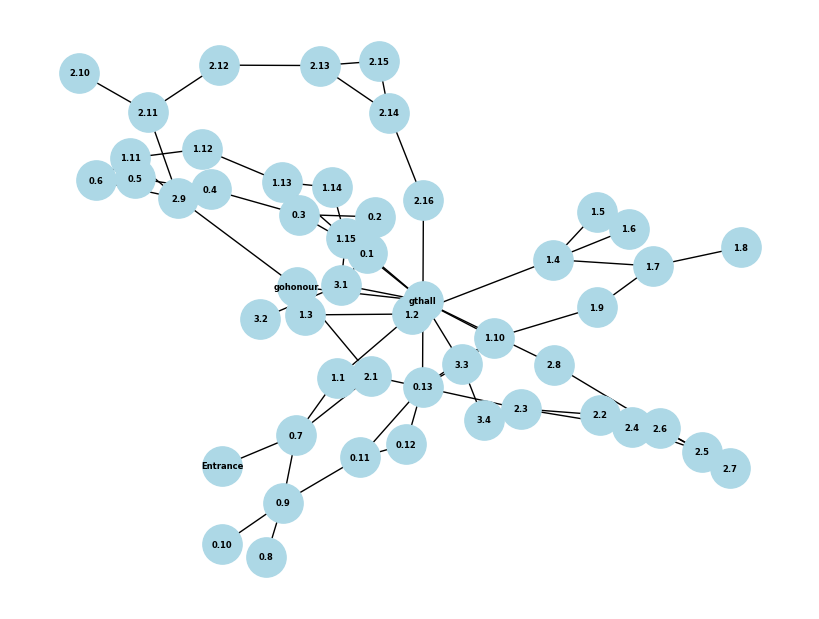

(51, 69)

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
g = nx.Graph()
# Add edges to the graph
g.add_edges_from(edges)

# Count nodes and edges
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(g, with_labels=True, node_color='lightblue', font_size=6, node_size=800, font_color='black', font_weight='bold')
plt.show()

num_nodes, num_edges

In [6]:
import networkx as nx

# Initialize the graph with edges
G = nx.Graph()
G.add_edges_from(edges)

# Define DFS path traversal that starts and ends at the Entrance
def dfs_custom_path(graph, start_node):
    visited_edges = set()
    path = []
    stack = [(start_node, list(graph.neighbors(start_node)))]

    while stack:
        node, neighbors = stack[-1]

        # Explore neighbors if available
        if neighbors:
            next_node = neighbors.pop(0)
            edge = (node, next_node) if node < next_node else (next_node, node)

            # Traverse edge if not yet visited
            if edge not in visited_edges:
                visited_edges.add(edge)
                path.append(node)  # Append current node before moving to next
                stack.append((next_node, list(graph.neighbors(next_node))))
        else:
            # Backtrack if no unvisited neighbors
            path.append(node)
            stack.pop()

    # End at the entrance to form a closed loop if not already there
    if path[-1] != start_node:
        path.append(start_node)

    return path

# Generate the path starting and ending at Entrance
path_from_entrance = dfs_custom_path(G, "Entrance")
print("Path starting and ending at Entrance:", path_from_entrance)


Path starting and ending at Entrance: ['Entrance', '0.7', '1.1', '1.2', '1.3', '1.2', '1.4', '1.5', '1.4', '1.6', '1.4', '1.7', '1.8', '1.7', '1.9', '1.10', '0.13', '0.11', '0.9', '0.7', '2.1', '1.1', '2.1', 'gohonour', 'gthall', '0.1', '0.2', '0.3', '0.1', '1.15', '1.13', '1.12', '1.11', '0.6', '0.5', '0.4', '0.3', '0.4', '0.5', '0.6', '2.9', '1.11', '2.9', 'gohonour', '2.9', '2.11', '2.10', '2.11', '2.12', '2.13', '2.14', '2.15', '2.13', '2.15', '2.14', '2.16', 'gthall', '0.13', '0.12', '0.11', '0.12', '0.13', '3.3', '1.10', 'gthall', '1.15', '1.14', '1.13', '1.14', '1.15', '3.1', '0.1', '3.1', 'gthall', '2.8', '2.6', '2.5', '2.4', '2.3', '2.1', '2.3', '2.2', '2.3', '2.4', '2.5', '2.7', '2.6', '2.7', '2.5', '2.6', '2.8', 'gthall', '3.3', '3.4', '3.3', 'gthall', '3.1', '3.2', '3.1', '1.15', 'gthall', '1.10', '3.3', '0.13', 'gthall', '2.16', '2.14', '2.13', '2.12', '2.11', '2.9', '0.6', '1.11', '1.12', '1.13', '1.15', '0.1', '0.3', '0.2', '0.1', 'gthall', 'gohonour', '2.1', '0.7', '0.9

In [7]:
num_distinct_values = len(set(path_from_entrance))
print(num_distinct_values)
print(len(path_from_entrance))
print(path_from_entrance[70])

51
139
3.1


In [8]:
import networkx as nx

# Define your graph G with nodes and edges
G = nx.Graph()
G.add_edges_from(edges)  # Add your list of edges

# Define the entrance node
entrance_node = 'Entrance'  # Replace with your actual entrance node

# Create a custom Open TSP path starting from the entrance
current_node = entrance_node
visited_nodes = set()
tsp_path = []

while len(visited_nodes) < len(G.nodes):
    # Add the current node to the path and mark it as visited
    tsp_path.append(current_node)
    visited_nodes.add(current_node)
    
    # Find the closest unvisited neighbor
    neighbors = [(neighbor, G[current_node][neighbor].get('weight', 1)) for neighbor in G.neighbors(current_node) if neighbor not in visited_nodes]
    
    if neighbors:
        # Move to the nearest unvisited neighbor
        next_node = min(neighbors, key=lambda x: x[1])[0]
    else:
        # If no unvisited neighbors, backtrack to the nearest node with unvisited neighbors
        unvisited_nodes = [node for node in G.nodes if node not in visited_nodes]
        if not unvisited_nodes:
            break  # All nodes are visited
        
        # Find the shortest path to any unvisited node
        distances = {node: nx.shortest_path_length(G, current_node, node, weight='weight') for node in unvisited_nodes}
        next_node = min(distances, key=distances.get)
        tsp_path.extend(nx.shortest_path(G, current_node, next_node, weight='weight')[:-1])  # Avoid duplicating `next_node`
    
    current_node = next_node

# Output the custom Open TSP path starting from the entrance
print("Custom Open TSP Path starting from entrance:", tsp_path)


Custom Open TSP Path starting from entrance: ['Entrance', '0.7', '1.1', '1.2', '1.3', '1.3', '1.2', '1.4', '1.5', '1.5', '1.4', '1.6', '1.6', '1.4', '1.7', '1.8', '1.8', '1.7', '1.9', '1.10', '0.13', '0.11', '0.9', '0.8', '0.8', '0.9', '0.10', '0.10', '0.9', '0.7', '2.1', 'gohonour', 'gthall', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.11', '2.9', '2.11', '2.10', '2.10', '2.11', '2.12', '2.13', '2.14', '2.15', '2.15', '2.14', '2.16', '2.16', 'gthall', '1.15', '1.13', '1.12', '1.12', '1.13', '1.14', '1.14', '1.15', '3.1', '3.2', '3.2', '3.1', 'gthall', '3.3', '3.4', '3.4', '3.3', '0.13', '0.12', '0.12', '0.13', 'gthall', '2.8', '2.6', '2.5', '2.4', '2.3', '2.2', '2.2', '2.3', '2.4', '2.5', '2.7']


In [9]:
# Define your graph G with nodes and edges
G = nx.Graph()
G.add_edges_from(edges)  # Add your list of edges

# Define the entrance node
entrance_node = 'Entrance'  # Replace with your actual entrance node

# Custom Open TSP path starting from the entrance with minimal duplicates
current_node = entrance_node
visited_nodes = set()
tsp_path = []

while len(visited_nodes) < len(G.nodes):
    # Add the current node to the path and mark it as visited
    tsp_path.append(current_node)
    visited_nodes.add(current_node)
    
    # Find the closest unvisited neighbor
    neighbors = [(neighbor, G[current_node][neighbor].get('weight', 1)) 
                 for neighbor in G.neighbors(current_node) if neighbor not in visited_nodes]
    
    if neighbors:
        # Move to the nearest unvisited neighbor
        next_node = min(neighbors, key=lambda x: x[1])[0]
    else:
        # If no unvisited neighbors, backtrack to the nearest node with unvisited neighbors
        unvisited_nodes = [node for node in G.nodes if node not in visited_nodes]
        if not unvisited_nodes:
            break  # All nodes are visited

        # Find the shortest path to any unvisited node
        distances = {node: nx.shortest_path_length(G, current_node, node, weight='weight') 
                     for node in unvisited_nodes}
        # Move to the closest unvisited node
        next_node = min(distances, key=distances.get)
        
        # Add nodes along the path without duplicating the last node
        tsp_path.extend(nx.shortest_path(G, current_node, next_node, weight='weight')[:-1])

    current_node = next_node

# Remove consecutive duplicate nodes from tsp_path to create a cleaner path
final_path = []
for i, node in enumerate(tsp_path):
    if i == 0 or node != tsp_path[i - 1]:
        final_path.append(node)

# Output the final Open TSP path
print("Custom Open TSP Path starting from entrance with minimal duplicates:", final_path)


Custom Open TSP Path starting from entrance with minimal duplicates: ['Entrance', '0.7', '1.1', '1.2', '1.3', '1.2', '1.4', '1.5', '1.4', '1.6', '1.4', '1.7', '1.8', '1.7', '1.9', '1.10', '0.13', '0.11', '0.9', '0.8', '0.9', '0.10', '0.9', '0.7', '2.1', 'gohonour', 'gthall', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.11', '2.9', '2.11', '2.10', '2.11', '2.12', '2.13', '2.14', '2.15', '2.14', '2.16', 'gthall', '1.15', '1.13', '1.12', '1.13', '1.14', '1.15', '3.1', '3.2', '3.1', 'gthall', '3.3', '3.4', '3.3', '0.13', '0.12', '0.13', 'gthall', '2.8', '2.6', '2.5', '2.4', '2.3', '2.2', '2.3', '2.4', '2.5', '2.7']


In [10]:
num_distinct_values = len(set(tsp_path))
print(num_distinct_values)
print(len(tsp_path))

51
87


In [11]:
num_distinct_values = len(set(final_path))
print(num_distinct_values)
print(len(final_path))

51
72


In [12]:
# Original museum graph G with rooms as nodes and doorways/stairs as edges
G = nx.Graph()
G.add_edges_from(edges)  # Add your list of edges representing rooms connected by doorways or stairs

# Create the transformed graph G' where nodes represent doorways or stairs (edges in G)
G_transformed = nx.Graph()

# Step 1: For each edge in the original graph, add a node in the transformed graph
edge_to_node = {}  # Mapping from original edges to new nodes in G'
for edge in G.edges:
    node_name = f"{edge[0]}-{edge[1]}"
    edge_to_node[edge] = node_name
    G_transformed.add_node(node_name)

# Step 2: For each pair of adjacent edges in G (sharing a common room), connect corresponding nodes in G'
for node in G.nodes:
    neighbors = list(G.neighbors(node))
    
    # Connect each pair of edges sharing the same node in G
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            edge1 = (node, neighbors[i]) if (node, neighbors[i]) in G.edges else (neighbors[i], node)
            edge2 = (node, neighbors[j]) if (node, neighbors[j]) in G.edges else (neighbors[j], node)
            if edge1 in edge_to_node and edge2 in edge_to_node:
                G_transformed.add_edge(edge_to_node[edge1], edge_to_node[edge2])

# Display transformed graph nodes and edges
print("Transformed Graph Nodes:", G_transformed.nodes())
print("Transformed Graph Edges:", G_transformed.edges())

# Check if the transformed graph has an Eulerian path or circuit
if nx.is_eulerian(G_transformed):
    eulerian_path = list(nx.eulerian_path(G_transformed))
    print("Eulerian Path/Circuit:", eulerian_path)
else:
    print("The graph does not have an Eulerian path or circuit.")


Transformed Graph Nodes: ['0.1-0.2', '0.1-0.3', '0.1-1.15', '0.1-gthall', '0.1-3.1', '0.2-0.3', '0.3-0.4', '1.15-1.13', '1.15-1.14', '1.15-gthall', '1.15-3.1', 'gthall-0.13', 'gthall-1.10', 'gthall-2.8', 'gthall-3.3', 'gthall-3.1', 'gthall-gohonour', 'gthall-2.16', '3.1-3.2', '0.4-0.5', '0.5-0.6', '0.6-1.11', '0.6-2.9', '1.11-2.9', '1.11-1.12', '2.9-gohonour', '2.9-2.11', '0.7-1.1', '0.7-2.1', '0.7-Entrance', '0.7-0.9', '1.1-1.2', '1.1-2.1', '2.1-gohonour', '2.1-2.3', '0.9-0.8', '0.9-0.10', '0.9-0.11', '0.11-0.12', '0.11-0.13', '0.12-0.13', '0.13-1.10', '0.13-3.3', '1.10-1.9', '1.10-3.3', '3.3-3.4', '1.2-1.3', '1.2-1.4', '1.4-1.5', '1.4-1.6', '1.4-1.7', '1.7-1.8', '1.7-1.9', '1.12-1.13', '1.13-1.14', '2.3-2.2', '2.3-2.4', '2.4-2.5', '2.5-2.6', '2.5-2.7', '2.6-2.7', '2.6-2.8', '2.16-2.14', '2.11-2.10', '2.11-2.12', '2.12-2.13', '2.13-2.14', '2.13-2.15', '2.14-2.15']
Transformed Graph Edges: [('0.1-0.2', '0.1-0.3'), ('0.1-0.2', '0.1-1.15'), ('0.1-0.2', '0.1-gthall'), ('0.1-0.2', '0.1-3.1

In [13]:
# Step 1: Calculate eccentricity for all rooms
eccentricities = nx.eccentricity(G)

# Step 2: Find the rooms with the minimum eccentricity
# Sort rooms by eccentricity to find the three most central rooms
central_rooms = sorted(eccentricities, key=eccentricities.get)[:3]

# Display the three most suitable rooms and their eccentricities
for room in central_rooms:
    print(f"Room: {room}, Eccentricity: {eccentricities[room]}")


Room: gthall, Eccentricity: 5
Room: 2.1, Eccentricity: 5
Room: 1.10, Eccentricity: 5


In [10]:
import csv
import re
from collections import defaultdict

# Initialize the adjacency list as a dictionary of dictionaries
mentions_graph = defaultdict(lambda: defaultdict(int))

# Define regex pattern for extracting mentions
mention_pattern = re.compile(r"@(\w+)")

# Parse the input TSV file
with open('twitter-smaller.tsv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        if len(row) < 3:
            continue  # Skip if row doesn't have the expected format
        user = row[1]  # The user who posted the tweet
        tweet = row[2]  # The content of the tweet

        # Find all mentions in the tweet
        mentions = mention_pattern.findall(tweet)
        
        # Update mentions count for each mentioned user
        for mention in mentions:
            mentions_graph[user][mention] += 1

In [15]:
with open('mention_graph.tsv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['source', 'target', 'weight'])
    for user, targets in mentions_graph.items():
        for target, weight in targets.items():
            writer.writerow([user, target, weight])

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# Initialize a directed graph
graph = nx.DiGraph()

# Read the TSV file with UTF-8 encoding and build the graph
with open("twitter-small.tsv", "r", encoding="utf-8") as file:
    for line in file:
        fields = line.strip().split("\t")
        if len(fields) < 3:
            continue  # Skip any malformed lines
        username = fields[1]
        tweet = fields[2]
        
        # Find mentions in the tweet text using regex
        mentions = re.findall(r'@(\w+)', tweet)
        
        for mention in set(mentions):  # Use set to avoid duplicate mentions within the same tweet
            if graph.has_edge(username, mention):
                graph[username][mention]['weight'] += 1
            else:
                graph.add_edge(username, mention, weight=1)


In [12]:
#Calculate statistics for the graph
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
strongly_connected_components = list(nx.strongly_connected_components(graph))
weakly_connected_components = list(nx.weakly_connected_components(graph))

In [13]:
num_strongly_connected = len(strongly_connected_components)
largest_strongly_connected_size = len(max(strongly_connected_components, key=len))
num_weakly_connected = len(weakly_connected_components)
largest_weakly_connected_size = len(max(weakly_connected_components, key=len))

In [14]:
density = nx.density(graph)
density

4.444644301663516e-06

In [15]:
average_clustering_coefficient = nx.average_clustering(graph.to_undirected())
average_clustering_coefficient

0.06613759864844608

In [23]:
import random
largest_weakly_connected = graph.subgraph(max(weakly_connected_components, key=len)).to_undirected()
sample_size = 1000  # Choose a sample size
sampled_nodes = random.sample(largest_weakly_connected.nodes(), sample_size)
# Calculate pairwise distances for sampled nodes
distances = []
for i in range(len(sampled_nodes)):
    for j in range(i + 1, len(sampled_nodes)):
        # Get the shortest path length between sampled nodes
        distance = nx.shortest_path_length(largest_weakly_connected, sampled_nodes[i], sampled_nodes[j])
        distances.append(distance)

# Step 4: Compute the average distance
average_distance = sum(distances) / len(distances)
print(f'Approximated Average Distance in the Giant Component: {average_distance}')

C:\Users\MJM\AppData\Local\Temp\ipykernel_15076\3505312915.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(largest_weakly_connected.nodes(), sample_size)


Approximated Average Distance in the Giant Component: 5.60646046046046


In [17]:
# Print the statistics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Number of strongly connected components: {num_strongly_connected}")
print(f"Size of largest strongly connected component: {largest_strongly_connected_size}")
print(f"Number of weakly connected components: {num_weakly_connected}")
print(f"Size of largest weakly connected component: {largest_weakly_connected_size}")
print(f"Density: {density:.4f}")
print(f"Average node clustering coefficient: {average_clustering_coefficient:.4f}")
print(f"Average distance in the giant component: {average_distance:.4f}")

Number of nodes: 546585
Number of edges: 1327858
Number of strongly connected components: 519906
Size of largest strongly connected component: 24568
Number of weakly connected components: 13675
Size of largest weakly connected component: 505803
Density: 0.0000
Average node clustering coefficient: 0.0661
Average distance in the giant component: 5.6312


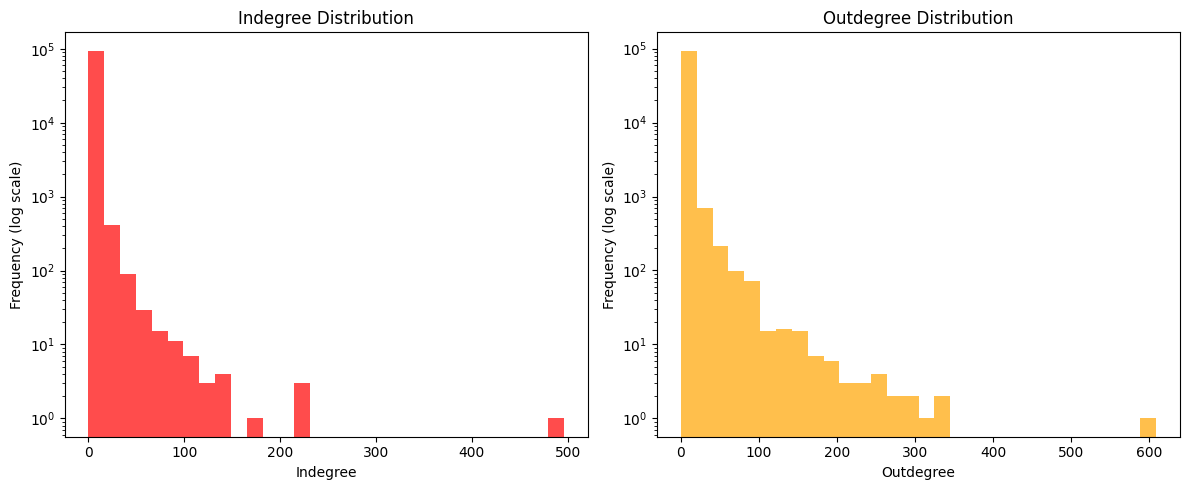

In [56]:
# Assuming 'graph' is your directed graph
in_degrees = [d for _, d in graph.in_degree()]
out_degrees = [d for _, d in graph.out_degree()]

plt.figure(figsize=(12, 5))

# Indegree Distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=50, color='red', alpha=0.7)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Indegree Distribution')
plt.xlabel('Indegree')
plt.ylabel('Frequency')

# Outdegree Distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=50, color='orange', alpha=0.7)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Outdegree Distribution')
plt.xlabel('Outdegree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

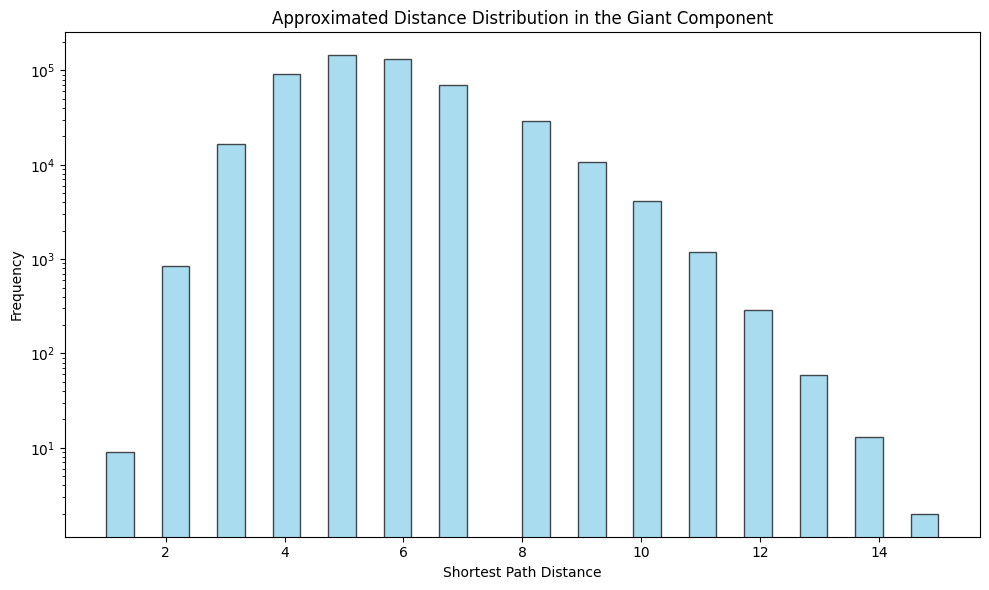

In [24]:
# Plot the distance distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Approximated Distance Distribution in the Giant Component')
plt.xlabel('Shortest Path Distance')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for y-axis to better show lower-frequency distances

plt.tight_layout()
plt.show()

In [47]:
# Simplify processing if directionality can be ignored
undirected_graph = graph.to_undirected()

# Run degree centrality on the undirected graph
degree_centrality = nx.degree_centrality(undirected_graph)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]



In [50]:
# Approximate Betweenness Centrality (top 20 only)
top_betweenness = sorted(nx.betweenness_centrality(undirected_graph, k=100, normalized=True, seed=42).items(),
                         key=lambda x: x[1], reverse=True)[:20]

In [53]:
import random
sampled_nodes = random.sample(list(undirected_graph.nodes), 500)  # Adjust sample size as needed
closeness_centrality = {node: nx.closeness_centrality(undirected_graph, node) for node in sampled_nodes}
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]


In [54]:
from scipy.stats import kendalltau

# Extract top 20 node lists
top_degree_nodes = [node for node, _ in top_degree]
top_betweenness_nodes = [node for node, _ in top_betweenness]
top_closeness_nodes = [node for node, _ in top_closeness]

# Compute Kendall's Tau for each pair of rankings
tau_degree_betweenness, _ = kendalltau(top_degree_nodes, top_betweenness_nodes)
tau_degree_closeness, _ = kendalltau(top_degree_nodes, top_closeness_nodes)
tau_betweenness_closeness, _ = kendalltau(top_betweenness_nodes, top_closeness_nodes)

print(f"Kendall's Tau (Degree vs Betweenness): {tau_degree_betweenness}")
print(f"Kendall's Tau (Degree vs Closeness): {tau_degree_closeness}")
print(f"Kendall's Tau (Betweenness vs Closeness): {tau_betweenness_closeness}")


Kendall's Tau (Degree vs Betweenness): 0.22105263157894736
Kendall's Tau (Degree vs Closeness): -0.06315789473684211
Kendall's Tau (Betweenness vs Closeness): -0.021052631578947368


In [28]:
import community as community_louvain
import matplotlib.pyplot as plt

# Apply Louvain community detection on the giant component
partition = community_louvain.best_partition(largest_weakly_connected)

In [29]:
# Draw the network with community colors
pos = nx.spring_layout(largest_weakly_connected)
plt.figure(figsize=(12, 10))
colors = [partition[node] for node in largest_weakly_connected.nodes()]
nx.draw(largest_weakly_connected, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.tab20)
plt.title("Communities in the Giant Component")
plt.show()


KeyboardInterrupt: 

In [30]:
modularity = community_louvain.modularity(partition, largest_weakly_connected)
print(f"Modularity of the community structure: {modularity}")

Modularity of the community structure: 0.6406498350896822


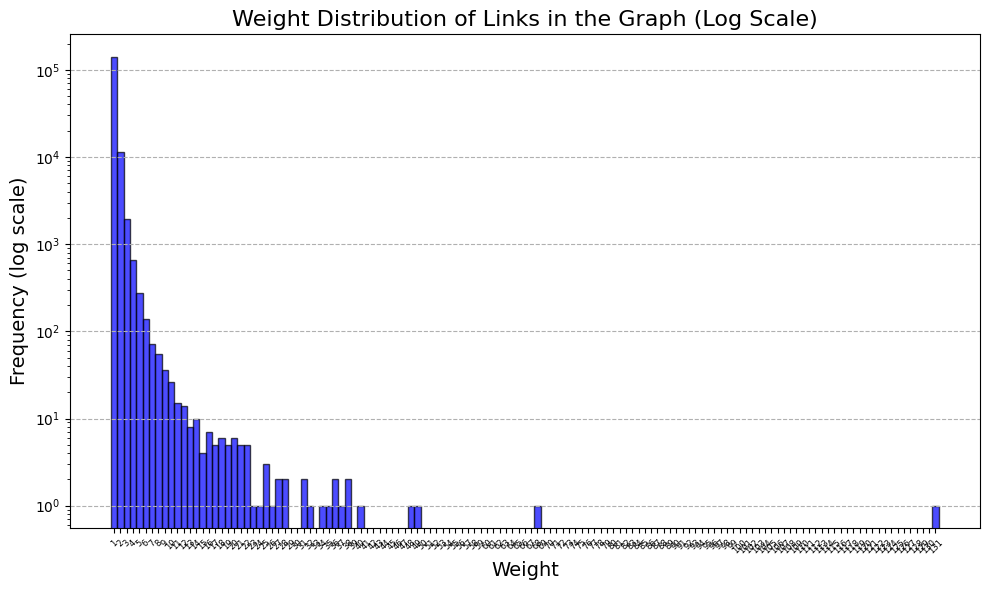

In [41]:
# Extract weights from the graph
weights = [d['weight'] for u, v, d in graph.edges(data=True)]

# Create a histogram for weight distribution
plt.figure(figsize=(10, 6))
plt.hist(weights, bins=range(int(min(weights)), int(max(weights)) + 2), align='left', alpha=0.7, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Weight Distribution of Links in the Graph (Log Scale)', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)

# Set logarithmic scale for y-axis
plt.yscale('log')

# Improve x-tick labels visibility with inclination
x_ticks = range(int(min(weights)), int(max(weights)) + 1)
plt.xticks(x_ticks, rotation=45, fontsize=6)  # Set inclined x-ticks

plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

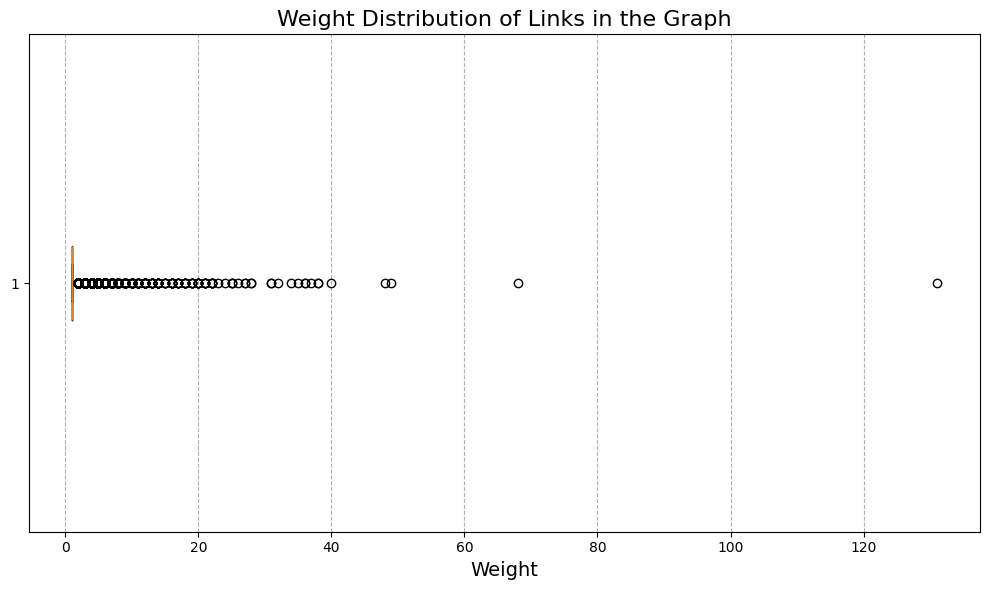

In [42]:
# Extract weights from the graph
weights = [d['weight'] for u, v, d in graph.edges(data=True)]

# Create a box plot for weight distribution
plt.figure(figsize=(10, 6))
plt.boxplot(weights, vert=False)

# Adding titles and labels
plt.title('Weight Distribution of Links in the Graph', fontsize=16)
plt.xlabel('Weight', fontsize=14)

plt.grid(axis='x', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

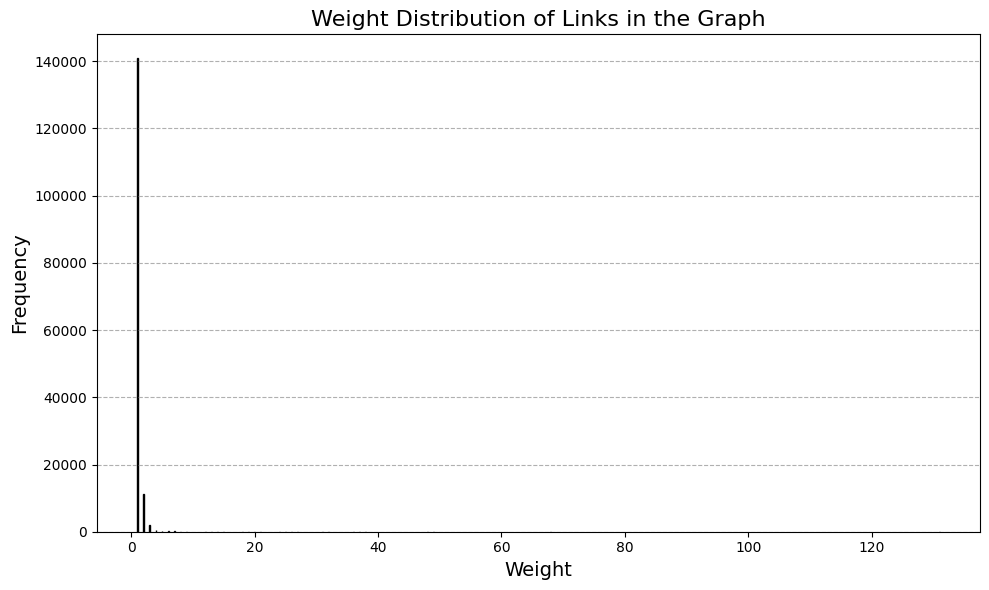

In [43]:
import numpy as np
# Count frequencies of each weight
weight_counts = np.unique(weights, return_counts=True)

# Create a bar plot for weight distribution
plt.figure(figsize=(10, 6))
plt.bar(weight_counts[0], weight_counts[1], width=0.1, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Weight Distribution of Links in the Graph', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.savefig('weight_distribution_barplot.png')  # Save as PNG file
plt.show()
